<div style="text-align: center;">
    <h2> <b>METODE NAIVE BAYES UNTUK PREDIKSI KELULUSAN (STUDI KASUS: DATA MAHASISWA BARU PERGURUAN TINGGI)</b></div>
</div>


<div>
    <h3> <b>Anggota Kelompok</b></div>
    <ol>
        <li><h4>Lalu Dwiky Indrajid Febriansyah (F1D018079)</h4></li>
        <li><h4>Dedy Razuna Aprimansyah (F1D019017)</h4></li>
        <li><h4>M Alfin Rido (F1D022068)</h4></li>
        <li><h4>Rizki Rahman Maulana (F1D022093)</h4></li>
        <li><h4>Rafli fachrin kardiansyah (F1D022154)</h4></li>
    </ol>
</div>

## **Pendahuluan**

### **Latar Belakang Topik**

Pembahasan topik ini akan menggunakan metode naïve bayes untuk melakukan prediksi peluang kelulusan mahasiswa baru. Kelulusan yang dimaksud adalah diterimanya seorang mahasiswa pada salah satu program studi di Perguruan Tinggi. Studi kasus dilakukan pada data mahasiswa Universitas Al Asyariah Mandar sulawesi Barat. Untuk dataset yang digunakan dalam pembahasan ini yaitu, data Penerimaan Mahasiswa Baru yang memiliki 7 atribut dan 26 record yang terdiri dari jurusan sekolah, pilihan pertama, pilihan kedua, nilai rata-rata, keterangan lulus, pilihan lulus dan jurusan lulus.

### **Latar Belakang Metode**

Metode Bayes adalah metode statistik yang digunakan untuk menghitung probabilitas suatu kejadian atau hipotesis dengan menggunakan informasi awal atau prior knowledge
yang dimiliki. Metode ini dinamakan berdasarkan nama matematikawan Inggris, Thomas Bayes, yang memperkenalkannya pada abad ke-18.
<br>
Pada dasarnya, metode Bayes menggabungkan data baru yang diperoleh dengan prior knowledge yang sudah ada untuk menghasilkan probabilitas yang lebih akurat. Dalam metode Bayes,
probabilitas suatu kejadian atau hipotesis ditentukan oleh kemungkinan kejadian tersebut, dan kemudian diperbarui berdasarkan data baru yang diperoleh.


## **Pembahasan**

### **Menyediakan Library Yang Akan Digunakan**

`import pandas as pd` : Ini mengimpor pustaka pandas dan menginisialisasi nama singkatnya menjadi pd. Pandas adalah pustaka yang digunakan untuk manipulasi dan analisis data tabular.

`pd.options.mode.chained_assignment` = None: Ini mengatur opsi mode chained_assignment di pandas menjadi None. Opsi ini mempengaruhi perilaku saat melakukan operasi penugasan berantai (chained assignment) pada DataFrames. Dalam hal ini, pengaturan ini menghilangkan peringatan yang mungkin muncul saat menggunakan operasi penugasan berantai pada DataFrames.

`import matplotlib.pyplot as plt` : Ini mengimpor pustaka matplotlib dan menginisialisasi nama singkatnya menjadi plt. Matplotlib adalah pustaka visualisasi data yang digunakan untuk membuat grafik dan plot.

`from scipy.stats import norm` : Ini mengimpor fungsi norm dari pustaka scipy.stats. Fungsi norm digunakan untuk menghasilkan distribusi normal.

In [16]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from scipy.stats import norm

### **Mengimport Dataset dan Menampilkannya**

`data = pd.read_excel('data.xlsx')`: Kodingan ini membaca file Excel dengan nama "data.xlsx" menggunakan pustaka pandas dan menyimpannya ke dalam variabel data. Data tersebut dianggap sebagai data tabular, dengan baris dan kolom.

In [17]:
data = pd.read_excel('Dataset.xlsx')
print(data)

   JURUSAN SEKOLAH       PILIHAN PERTAMA         PILIHAN KEDUA  NILAI RATA  \
0              IPA      Sistem Informasi     Ilmu Pemerintahan       51.94   
1              IPA      Sistem Informasi       Ilmu Komunikasi       50.07   
2              TKJ      Sistem Informasi    Teknik Informatika       52.50   
3              IPA      Bahasa Indonesia    Teknik Informatika       51.94   
4              IPA    Teknik Informatika            Peternakan       46.11   
5              IPA    Teknik Informatika            Peternakan       45.00   
6              IPS     Ilmu Pemerintahan      Sistem Informasi       42.78   
7        KESEHATAN                  PPKn  Kesehatan Masyarakat       50.28   
8        KESEHATAN                  PPKn    Teknik Informatika       53.06   
9        KESEHATAN                  PPKn    Teknik Informatika       51.06   
10       KESEHATAN  Kesehatan Masyarakat            Peternakan       47.22   
11       KESEHATAN      Bahasa Indonesia         Ekonomi Islam  

### **Mendapatkan Sampel Dengan Menggunakan Perhitungan Bayes**

Sebagai Contoh disini menggunakan salah satu data siswa dari data di atas, kita perlu menyiapkan varibel dataframe baru untuk menyimpan data tersebut dan 2 variabel dataframe baru untuk menyimpan hasil perhitungan probabilitas diterima pada pilihan pertama atau diterima pada pilihan kedua jika menggunakan data siswa tersebut
```
siswa=pd.DataFrame({
    "JURUSAN SEKOLAH":['IPA'],
    "PILIHAN PERTAMA":["Sistem Informasi"],
    "PILIHAN KEDUA":["Ilmu Pemerintahan"],
    "NILAI RATA":[51.94],
    "PILIHAN LULUS":["PIL1"]
})
``` 
Pada blok ini, kita membuat sebuah Dataframe dengan nama "siswa". Dataframe ini memiliki lima kolom: "JURUSAN SEKOLAH", "PILIHAN PERTAMA", "PILIHAN KEDUA", "NILAI RATA", dan "PILIHAN LULUS". Setiap kolom diinisialisasi dengan data yang diberikan di dalam tanda kurung kurawal.
```
S_pilihan1 = pd.DataFrame({
    "JURUSAN SEKOLAH":[0],
    "PILIHAN PERTAMA":[0],
    "PILIHAN KEDUA":[0],
    "NILAI RATA":[0],
    "PILIHAN LULUS":[0]
})
```
Pada blok ini, kita membuat Dataframe baru dengan nama "S_pilihan1". Dataframe ini juga memiliki lima kolom yang sama seperti Dataframe "siswa". Setiap kolom diinisialisasi dengan nilai 0.
```
S_pilihan2 = pd.DataFrame({
    "JURUSAN SEKOLAH":[0],
    "PILIHAN PERTAMA":[0],
    "PILIHAN KEDUA":[0],
    "NILAI RATA":[0],
    "PILIHAN LULUS":[0]
})
```
Pada blok ini, kita membuat Dataframe baru dengan nama "S_pilihan2". Dataframe ini juga memiliki lima kolom yang sama seperti Dataframe "siswa" dan "S_pilihan2". Setiap kolom diinisialisasi dengan nilai 0.

In [18]:
siswa = pd.DataFrame({
    "JURUSAN SEKOLAH": ["IPA"],
    "PILIHAN PERTAMA": ["Sistem Informasi"],
    "PILIHAN KEDUA": ["Ilmu Pemerintahan"],
    "NILAI RATA": [51.94],
    "PILIHAN LULUS": ["PIL1"]
})

print("Contoh Data Siswa")
print(siswa)

S_pilihan1 = pd.DataFrame({
    "JURUSAN SEKOLAH": [0.0],
    "PILIHAN PERTAMA": [0.0],
    "PILIHAN KEDUA": [0.0],
    "NILAI RATA": [0.0],
    "PILIHAN LULUS": [0.0]
})

S_pilihan2 = pd.DataFrame({
    "JURUSAN SEKOLAH": [0.0],
    "PILIHAN PERTAMA": [0.0],
    "PILIHAN KEDUA": [0.0],
    "NILAI RATA": [0.0],
    "PILIHAN LULUS": [0.0]
})

Contoh Data Siswa
  JURUSAN SEKOLAH   PILIHAN PERTAMA      PILIHAN KEDUA  NILAI RATA  \
0             IPA  Sistem Informasi  Ilmu Pemerintahan       51.94   

  PILIHAN LULUS  
0          PIL1  


### **Mendapatkan Jumlah Total Siswa Yang Diterima di Pilihan 1 dan Diterima di Pilihan 2**

Menghitung total siswa yang diterima di pilihan 1 dan diterima di pilihan 2 berdasarkan data yang telah diimport sebelumnya dengan mengakses kolom hasil dari dataframe yang mana jika pada kolom tersebut tertulis 'PIL1' maka variabel countPilihan11 akan diincrement 1 jika tidak maka variabel countPilihan2 yang akan diincrement 1

In [19]:
# Count choices
countPilihan1 = 0
countPilihan2 = 0
for indeks, value in data["PILIHAN LULUS"].items():
    if value == "PIL1":
        countPilihan1 += 1
    elif value == "PIL2":
        countPilihan2 += 1

print(countPilihan1, countPilihan2)

20 5


### **Membuat Function Untuk Mendapatkan Probabilitas Kejadian Pada Setiap Kolom Data**

Kode berikut adalah sebuah fungsi bernama probb yang digunakan untuk menghitung probabilitas berdasarkan kondisi yang diberikan.

`def probb(siswa, Kolom, Kondisi,i):` : Ini adalah deklarasi fungsi dengan nama probb. Fungsi ini menerima empat parameter: siswa (Dataframe yang berisi data siswa), Kolom (nama kolom yang akan digunakan untuk mencocokkan kondisi), Kondisi (kondisi yang akan digunakan untuk mencocokkan nilai dalam kolom), dan i (indeks dari baris data siswa yang sedang diproses).

`result = 0` : Variabel result diinisialisasi dengan nilai 0. Variabel ini akan digunakan untuk menyimpan hasil probabilitas.

`total = 0` : Variabel total diinisialisasi dengan nilai 0. Variabel ini akan digunakan untuk menghitung total jumlah data yang memenuhi kondisi tertentu.

`count = 0` : Variabel count diinisialisasi dengan nilai 0. Variabel ini akan digunakan untuk menghitung total jumlah data yang memenuhi kondisi pada kolom "PILIHAN LULUS".

`for indeks, value in data[Kolom].items()` : : Ini adalah loop for yang digunakan untuk mengiterasi setiap item dalam kolom yang diberikan (Kolom) dari Dataframe "data". indeks akan berisi indeks dari setiap item, sedangkan value akan berisi nilai dari setiap item.

`if value == siswa[Kolom][i] and data["PILIHAN LULUS"][indeks] == Kondisi:` : Ini adalah kondisi if yang akan dievaluasi untuk setiap nilai dalam kolom yang diberikan (Kolom). Jika nilai tersebut sama dengan nilai dari kolom yang sesuai dalam data siswa (siswa[Kolom][i]) dan nilai dalam kolom "PILIHAN LULUS" juga sama dengan kondisi yang diberikan (Kondisi), maka blok kode di dalamnya akan dieksekusi.

`total += 1` : Jika kondisi di atas terpenuhi, variabel total akan bertambah 1. Ini akan menghitung jumlah data yang memenuhi kondisi tertentu.

`if siswa["PILIHAN LULUS"][indeks] == Kondisi:` : Ini adalah kondisi if yang akan dievaluasi untuk setiap nilai dalam kolom "PILIHAN LULUS" pada data siswa (siswa["PILIHAN LULUS"][indeks]). Jika nilai tersebut sama dengan kondisi yang diberikan (Kondisi), maka blok kode di dalamnya akan dieksekusi.

`count += 1` : Jika kondisi di atas terpenuhi, variabel count akan bertambah 1. Ini akan menghitung jumlah data yang memenuhi kondisi pada kolom "PILIHAN LULUS".

`if count > 0:` : Ini adalah kondisi if yang akan dievaluasi jika count lebih besar dari 0.

`result` = total / count : Jika kondisi di atas terpenuhi, variabel result akan diisi dengan hasil pembagian total dengan count. Ini akan meng

In [20]:
# Define probability functions
def prob(Kolom, Kondisi):
    result = 0
    total = 0
    count = 0
    for indeks, value in data[Kolom].items():
        if value == siswa[Kolom][0] and data["PILIHAN LULUS"][indeks] == Kondisi:
            total += 1
        if data["PILIHAN LULUS"][indeks] == Kondisi:
            count += 1
    if count > 0:
        result = total / count
    return result 

def probb(siswa, Kolom, Kondisi, i):
    result = 0
    total = 0
    count = 0
    for indeks, value in data[Kolom].items():
        if value == siswa[Kolom][i] and data["PILIHAN LULUS"][indeks] == Kondisi:
            total += 1
        if data["PILIHAN LULUS"][indeks] == Kondisi:
            count += 1
    if count > 0:
        result = total / count
    return result

# Test probability functions
print(prob("JURUSAN SEKOLAH", "PIL1"))
print(probb(siswa, "JURUSAN SEKOLAH", "PIL1", 0))

0.4
0.4


In [21]:
# Menggunakan .at untuk assignment tunggal
S_pilihan1.at[0, "JURUSAN SEKOLAH"] = prob("JURUSAN SEKOLAH", 'PIL1')
S_pilihan1.at[0, "PILIHAN PERTAMA"] = prob("PILIHAN PERTAMA", 'PIL1')
S_pilihan1.at[0, "PILIHAN KEDUA"] = prob("PILIHAN KEDUA", 'PIL1')
S_pilihan1.at[0, "NILAI RATA"] = prob("NILAI RATA", 'PIL1')
S_pilihan1.at[0, "PILIHAN LULUS"] = prob("PILIHAN LULUS", 'PIL1')

S_pilihan2.at[0, "JURUSAN SEKOLAH"] = prob("JURUSAN SEKOLAH", 'PIL2')
S_pilihan2.at[0, "PILIHAN PERTAMA"] = prob("PILIHAN PERTAMA", 'PIL2')
S_pilihan2.at[0, "PILIHAN KEDUA"] = prob("PILIHAN KEDUA", 'PIL2')
S_pilihan2.at[0, "NILAI RATA"] = prob("NILAI RATA", 'PIL2')
S_pilihan2.at[0, "PILIHAN LULUS"] = prob("PILIHAN LULUS", 'PIL2')

print(S_pilihan1)
print(S_pilihan2)


   JURUSAN SEKOLAH  PILIHAN PERTAMA  PILIHAN KEDUA  NILAI RATA  PILIHAN LULUS
0              0.4             0.25           0.15        0.15            1.0
   JURUSAN SEKOLAH  PILIHAN PERTAMA  PILIHAN KEDUA  NILAI RATA  PILIHAN LULUS
0              0.4              0.2            0.2         0.0            0.0


In [22]:
print("Probabilitas Diterima di Pilihan 1")
print(S_pilihan1.prod().prod())
print("Probabilitas Diterima di Pilihan 2")
print(S_pilihan2.prod().prod())
print()
print("Probabilitas")
print("P(X|Diterima di Pilihan 1)\t= ",S_pilihan1.prod().prod()*countPilihan1/len(data))
print("P(X|Diterima di Pilihan 2)\t= ",S_pilihan2.prod().prod()*countPilihan2/len(data))


Probabilitas Diterima di Pilihan 1
0.00225
Probabilitas Diterima di Pilihan 2
0.0

Probabilitas
P(X|Diterima di Pilihan 1)	=  0.0018
P(X|Diterima di Pilihan 2)	=  0.0


### **Setelah didapatkan Hasil Uji coba Sampel Selanjutnya Melakukan Perhitungan Bayes Terhadap Keseluruhan Data**

Mendapatkan keseluruhan hasil perhitungan peluang keberhasilan semua siswa terhadap dataset yang nantinya akan digunakan untuk melakukan uji normalisasi data

In [23]:
# Inisialisasi kolom dengan tipe data float
data['P(Berhasil)'] = 0.0

# Loop untuk mengisi kolom 'P(Berhasil)'
for i in range(len(data)):
    data.loc[i, 'P(Berhasil)'] = (
        probb(data, "JURUSAN SEKOLAH", 'PIL1', i) *
        probb(data, "PILIHAN PERTAMA", 'PIL1', i) *
        probb(data, "PILIHAN KEDUA", 'PIL1', i) *
        probb(data, "NILAI RATA", 'PIL1', i) *
        probb(data, "PILIHAN LULUS", 'PIL1', i) *
        (countPilihan1 / len(data))
    )

# Cetak hasil
print(data)


   JURUSAN SEKOLAH       PILIHAN PERTAMA         PILIHAN KEDUA  NILAI RATA  \
0              IPA      Sistem Informasi     Ilmu Pemerintahan       51.94   
1              IPA      Sistem Informasi       Ilmu Komunikasi       50.07   
2              TKJ      Sistem Informasi    Teknik Informatika       52.50   
3              IPA      Bahasa Indonesia    Teknik Informatika       51.94   
4              IPA    Teknik Informatika            Peternakan       46.11   
5              IPA    Teknik Informatika            Peternakan       45.00   
6              IPS     Ilmu Pemerintahan      Sistem Informasi       42.78   
7        KESEHATAN                  PPKn  Kesehatan Masyarakat       50.28   
8        KESEHATAN                  PPKn    Teknik Informatika       53.06   
9        KESEHATAN                  PPKn    Teknik Informatika       51.06   
10       KESEHATAN  Kesehatan Masyarakat            Peternakan       47.22   
11       KESEHATAN      Bahasa Indonesia         Ekonomi Islam  

### **Melakukan Uji Normalisasi Terhadap Data Bayes**

Uji normalitas dalam konteks data Bayes adalah proses statistik untuk memeriksa apakah data yang digunakan dalam analisis Bayes mengikuti distribusi normal atau tidak. Uji ini penting untuk memastikan bahwa asumsi distribusi normal terpenuhi sebelum menerapkan metode Bayes pada data tersebut. 

Kode berikut melakukan beberapa perhitungan terkait normalisasi data dan menghitung beberapa metrik statistik untuk data yang diberikan

`normalisai = pd.DataFrame({'Contoh Data':data['P(Berhasil)']})` : Kode ini membuat sebuah DataFrame baru dengan nama "normalisasi". DataFrame ini memiliki satu kolom bernama "Contoh Data" yang berisi data dari kolom "P(Berhasil)" dari DataFrame "data".

`normalisai['Rank'] = normalisai['Contoh Data'].rank(method='min', ascending=True).astype(int)` : Kode ini menghitung peringkat (rank) dari data dalam kolom "Contoh Data" menggunakan metode 'min' dan menyimpan hasilnya dalam kolom baru bernama "Rank" dalam DataFrame "normalisasi".

`normalisai['Indeks'] = (normalisai['Rank'] - 3/8) / (len(normalisai) + 1/4)` : Kode ini menghitung indeks (index) berdasarkan peringkat dalam kolom "Rank" dan menyimpan hasilnya dalam kolom baru bernama "Indeks" dalam DataFrame "normalisai".

`normalisai['Formula Z-Score'] = norm.ppf(normalisai['Indeks'], 0, 1)` : Kode ini menghitung formula Z-Score (nilai Z) berdasarkan indeks dalam kolom "Indeks" menggunakan fungsi norm.ppf() dari modul scipy.stats.norm. Hasilnya disimpan dalam kolom baru bernama "Formula Z-Score" dalam DataFrame "normalisai".

`normalisai['PDF'] = norm.pdf(normalisai['Formula Z-Score'], loc=0, scale=1)` : Kode ini menghitung fungsi densitas probabilitas (PDF) berdasarkan formula Z-Score dalam kolom "Formula Z-Score" menggunakan fungsi norm.pdf() dari modul scipy.stats.norm. Hasilnya disimpan dalam kolom baru bernama "PDF" dalam DataFrame "normalisai".

`corr = normalisai['Contoh Data'].corr(normalisai['Formula Z-Score'])` : Kode ini menghitung korelasi antara kolom "Contoh Data" dan "Formula Z-Score" dalam DataFrame "normalisai" menggunakan metode korelasi Pearson. Hasilnya disimpan dalam variabel corr.

In [24]:
normalisai = pd.DataFrame({
    'Contoh Data':data['P(Berhasil)']
})
# menghitung rank
normalisai['Rank'] = normalisai['Contoh Data'].rank(method='min', ascending=True).astype(int)
# menghitung indeks
normalisai['Indeks'] = (normalisai['Rank'] - 3/10) / (len(normalisai) + 1/4)
# menghitung formula z-score
normalisai['Formula Z-Score'] = norm.ppf(normalisai['Indeks'], 0, 1)
# menghitung PDF
normalisai['PDF'] = norm.pdf(normalisai['Formula Z-Score'], loc=0, scale=1)

corr = normalisai['Contoh Data'].corr(normalisai['Formula Z-Score'])
print(normalisai)

print("Correlation = ", corr)
if corr > 0.05:
    print("Hasil : Data Normal")
else :
    print("Hasil : Data Tidak Normal")


    Contoh Data  Rank    Indeks  Formula Z-Score       PDF
0       0.00180    25  0.978218         2.018258  0.052046
1       0.00040    16  0.621782         0.310165  0.380207
2       0.00010    10  0.384158        -0.294577  0.382003
3       0.00096    24  0.938614         1.543241  0.121270
4       0.00000     1  0.027723        -1.915368  0.063720
5       0.00000     1  0.027723        -1.915368  0.063720
6       0.00016    11  0.423762        -0.192278  0.391635
7       0.00090    23  0.899010         1.275930  0.176764
8       0.00060    18  0.700990         0.527250  0.347172
9       0.00060    18  0.700990         0.527250  0.347172
10      0.00006     8  0.304950        -0.510215  0.350254
11      0.00000     1  0.027723        -1.915368  0.063720
12      0.00054    17  0.661386         0.416249  0.365836
13      0.00002     6  0.225743        -0.752941  0.300473
14      0.00032    15  0.582178         0.207469  0.390448
15      0.00000     1  0.027723        -1.915368  0.0637

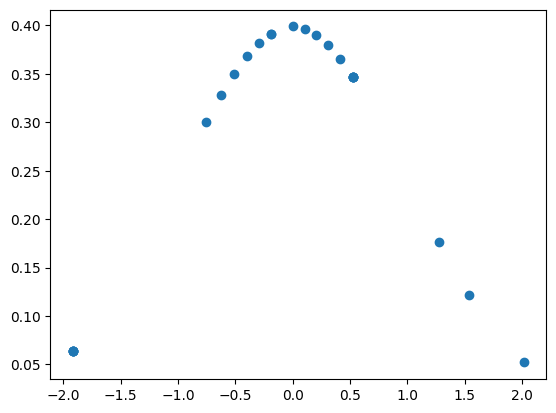

In [25]:
plt.scatter(normalisai['Formula Z-Score'],normalisai['PDF'])
plt.show()

### **Hasil Aplikasi Metode Bayes**

Setelah sebelumnya kita telah melakukan perhitungan bayes untuk menghitung peluang diterima pda pilihan 1 atau diterima pada pilihan 2 pada suatu perguruan tinggi, selanjutnya kita membuat program untuk menentukan seorang siswa lulus atau tidak dengan menggunakan data hasil perhitungan bayes setiap kategori penilaian sebelumnya yang telah dilakukan pada proses perhitungan manual pada presentasi excel sebelumnya.

In [26]:
JURUSAN_SEKOLAH = ['IPA', 'TKJ', 'IPS', 'KESEHATAN', 'BAHASA' ]
acc_JURUSAN = [0.4, 0.05, 0.2, 0.3, 0.05]
rej_JURUSAN = [0.4, 0.2, 0.2, 0.2, 0]

PILIHAN_PERTAMA = ["Sistem Informasi", "Bahasa Indonesia", "Teknik Informatika", "Ilmu Pemerintahan", 'PPKn', "Kesehatan Masyarakat", 'Agribisnis', 'Matematika', 'Peternakan']
acc_PERTAMA = [0.231, 0.115, 0.154, 0.077, 0.231, 0.077, 0.038, 0.038, 0.038]
rej_PERTAMA = [0.1538, 0, 0.1923, 0.1538, 0, 0.1538, 0, 0.0769, 0.1154]

PILIHAN_KEDUA = ["Ilmu Pemerintahan", "Ilmu Komunikasi", "Teknik Informatika", 'Peternakan', "Sistem Informasi", "Kesehatan Masyarakat", "Ekonomi Islam", 'Matematika']
acc_KEDUA =[0.08, 0, 0.16, 0, 0.24, 0.08, 0, 0.04]
rej_KEDUA = [0.16, 0.08, 0.16, 0.12, 0.16, 0.16, 0.08, 0.08]

NILAI_RATA = [19.44,  42.78, 43.61, 44.72, 45, 46.11, 47.22, 48.06, 50.07, 50.11, 50.28, 50.34, 50.83, 50.88, 51, 51.06, 51.33, 51.39, 51.94, 52.22, 52.5, 53.06, 53.33]
acc_RERATA = [0, 0.116,0.129,0.005,0.076,0.079,0.032,0.142,3.555,0.136,3.570,0.091,0.046,0.416,1.207,0.418,0.607,0.280,2.836,0.213,0.035,0.434,0.006]
rej_RERATA = [0.026, 0,0.119,0,0.081,0.083,0,1.279,0,0,0,0,0.091,0,0,0,0,0,0,0,0,0,0]

PILIHAN_LULUS = ['PIL1', 'PIL2']
acc_LULUS = [0.8,0.2]
rej_LULUS = [0.2, 0.8]

Misalkan disini kita menyalin data siswa pada data sebelumnya tanpa mengetahui hasilnya ia diterima pada pilihan 1 atau pilihan 2, lalu kita akan menentukan diterima pada pilihan 1 atau tidaknya siswa tersebut berdasarkan nilai nilai perkategori yang telah kita dapatkan sebelumnya

Disini kita membuat function untuk melakukan perhitungan tersebut yang diberi nama sistemCount karena proses penetuan lulus pada pilihan 1 atau pada pilihan 2 dari siswa berdasarkan perhitungan program, bukan berdasarkan penilaian subjektif

Fungsi sistemCount bisa dibilang mengimplementasikan logika untuk menentukan pilihan kelulusan siswa berdasarkan atribut-atribut yang ada dan probabilitas yang sudah dihitung sebelumnya.

In [27]:
def sistemCount(dataUji):
    result = dataUji.copy()
    for i in range(len(result)):
        pilihan1 = 0
        pilihan2 = 0
        for j in range(len(JURUSAN_SEKOLAH)):
            if result.loc[i, "JURUSAN SEKOLAH"] == JURUSAN_SEKOLAH[j]:
                pilihan1 = acc_JURUSAN[j]
                pilihan2 = rej_JURUSAN[j]
        for j in range(len(PILIHAN_PERTAMA)):
            if result.loc[i, "PILIHAN PERTAMA"] == PILIHAN_PERTAMA[j]:
                pilihan1 *= acc_PERTAMA[j]
                pilihan2 *= rej_PERTAMA[j]
        for j in range(len(PILIHAN_KEDUA)):
            if result.loc[i, "PILIHAN KEDUA"] == PILIHAN_KEDUA[j]:
                pilihan1 *= acc_KEDUA[j]
                pilihan2 *= rej_KEDUA[j]
        for j in range(len(NILAI_RATA)):
            if result.loc[i, "NILAI RATA"] == NILAI_RATA[j]:
                pilihan1 *= acc_RERATA[j]
                pilihan2 *= rej_RERATA[j]
        for j in range(len(PILIHAN_LULUS)):
            if result.loc[i, "PILIHAN LULUS"] == PILIHAN_LULUS[j]:
                pilihan1 *= acc_LULUS[j]
                pilihan2 *= rej_LULUS[j]
        if pilihan1 > pilihan2:
            result.loc[i, "PILIHAN LULUS"] = "PIL1"
        else:
            result.loc[i, "PILIHAN LULUS"] = "PIL2"
    return result

Bisa terlihat Bahwa pada tabel hasil perhitungan data2 atau perhitungan program memiliki hasil yang sama dengan hasil dari data awal, ini menandakan bahwa program tersebut berjalan dengan semestinya berdasarkan nilai kategori penilaian data pertama

In [28]:
data['P(Berhasil)'] = 0.0  # Menginisialisasi kolom dengan tipe data float
for i in range(len(data)):
    data.at[i, 'P(Berhasil)'] = (
        probb(data, "JURUSAN SEKOLAH", 'PIL1', i) *
        probb(data, "PILIHAN PERTAMA", 'PIL1', i) *
        probb(data, "PILIHAN KEDUA", 'PIL1', i) *
        probb(data, "NILAI RATA", 'PIL1', i) *
        probb(data, "PILIHAN LULUS", 'PIL1', i) *
        (countPilihan1 / len(data))
    )

print(data)

   JURUSAN SEKOLAH       PILIHAN PERTAMA         PILIHAN KEDUA  NILAI RATA  \
0              IPA      Sistem Informasi     Ilmu Pemerintahan       51.94   
1              IPA      Sistem Informasi       Ilmu Komunikasi       50.07   
2              TKJ      Sistem Informasi    Teknik Informatika       52.50   
3              IPA      Bahasa Indonesia    Teknik Informatika       51.94   
4              IPA    Teknik Informatika            Peternakan       46.11   
5              IPA    Teknik Informatika            Peternakan       45.00   
6              IPS     Ilmu Pemerintahan      Sistem Informasi       42.78   
7        KESEHATAN                  PPKn  Kesehatan Masyarakat       50.28   
8        KESEHATAN                  PPKn    Teknik Informatika       53.06   
9        KESEHATAN                  PPKn    Teknik Informatika       51.06   
10       KESEHATAN  Kesehatan Masyarakat            Peternakan       47.22   
11       KESEHATAN      Bahasa Indonesia         Ekonomi Islam  

### **Hipotesis**

H0 : Apakah variable Jurusan Sekolah dan Nilai Rata-Rata memiliki pengaruh terhadap tingkat keberhasilan seseorang diterima dalam Perguruan Tinggi

H1 : Apakah variable Jurusan Sekolah dan Nilai Rata-Rata tidak memiliki pengaruh terhadap tingkat keberhasilan seseorang diterima dalam Perguruan Tinggi

### **Pengujian Metode**

Untuk pengujian metode disini kita tidak menggunakan data diawal, namun menggunakan data baru untuk menguji keakuratan metode yang kita buat dan tetap menggunakan penilaian kategori pada data pertama

Pada hasil perhitungan program kita beri nama data_sistem, kemudian kita juga menampilkan total jumlah siswa yang lulus pada pilihan 1 dan lulus pada pilihan 2 untuk melihat adakah perbedaan hasil perhitungan data subjektif dan data sistem 

In [29]:
# Memuat data dari file Excel
data_subjektif = pd.read_excel('Sample.xlsx')

# Menghitung data sistem
data_Sistem = sistemCount(data_subjektif)

# Menghitung jumlah diterima di pilihan pertama dan kedua untuk data subjektif
a = data_subjektif["PILIHAN LULUS"].value_counts().get("PIL1", 0)
b = data_subjektif["PILIHAN LULUS"].value_counts().get("PIL2", 0)

# Menampilkan hasil perhitungan subjektif
print("Data Hasil Perhitungan Subjektif :")
print("Diterima di Pilihan Pertama : ", a)
print("Diterima di Pilihan Kedua : ", b)
print(data_subjektif, "\n")

# Menghitung jumlah diterima di pilihan pertama dan kedua untuk data sistem
a = data_Sistem["PILIHAN LULUS"].value_counts().get("PIL1", 0)
b = data_Sistem["PILIHAN LULUS"].value_counts().get("PIL2", 0)

# Menampilkan hasil perhitungan sistem
print("Data Hasil Perhitungan Sistem :")
print("Diterima di Pilihan Pertama : ", a)
print("Diterima di Pilihan Kedua : ", b)
print(data_Sistem)

Data Hasil Perhitungan Subjektif :
Diterima di Pilihan Pertama :  98
Diterima di Pilihan Kedua :  27
    JURUSAN SEKOLAH     PILIHAN PERTAMA       PILIHAN KEDUA  NILAI RATA  \
0               IPA    Sistem Informasi   Ilmu Pemerintahan       51.94   
1               IPA    Sistem Informasi     Ilmu Komunikasi       50.07   
2               TKJ    Sistem Informasi  Teknik Informatika       52.50   
3               IPA    Bahasa Indonesia  Teknik Informatika       51.94   
4               IPA  Teknik Informatika          Peternakan       46.11   
..              ...                 ...                 ...         ...   
120             IPS    Sistem Informasi          Matematika       50.34   
121          BAHASA   Ilmu Pemerintahan          Matematika       44.72   
122             IPA    Bahasa Indonesia    Sistem Informasi       50.88   
123             IPS                PPKn   Ilmu Pemerintahan       43.61   
124             IPA          Agribisnis       Ekonomi Islam       51.33   

Bisa dilihat bahwa jumlah total siswa diterima pada pilihan 1 dan diterima pada pilihan 2 pada setiap data uji berbeda, ini menandakan bahwa terdapat perbedaan pada hasil perhitungan subjektif dan sistem

Selanjutnya kita akan menghitung persentase keakuratan perhitungan sistem dengan membandingkan satu persatu setiap elemen data uji berapa banyak dari total hasil yang sesuai dari data sistem dengan data subjektif

In [30]:
def akurasi(data1, data2):
    count=0
    for i in range(len(data1)):
        if data1['PILIHAN LULUS'][i] == data2["PILIHAN LULUS"][i]:
            count+=1
    print("Jumlah Data Yang Sesuai",count," dari Total ",len(data1)," Data")
    return count/len(data1)*100
akurasiBayes = akurasi(data_subjektif,data_Sistem)
print("Akurasi Metode : ",akurasiBayes,"%")

Jumlah Data Yang Sesuai 94  dari Total  125  Data
Akurasi Metode :  75.2 %


Disini kita mendapatkan keakuratan hasil perhitungan sistem yaitu 75.2% yang menandakan bahwa hasil dari perhitungan sistem masih belum dapat keakuratan yang persis seperti data hasil penilaian subjektif